In [1]:
using PyPlot,JLD2,CALCEPH

In [2]:
include("decompose_ttvs.jl")
include("plot_ttvs.jl")
include("plot_likelihood.jl")
include("corner_plot.jl")

corner_planet (generic function with 1 method)

In [3]:
p_11=jldopen("FITS/p3_fit10.0s10.0yrs.jld2");p_mc11 = jldopen("MCMC/p3_mcmc10.0s10.0yrs.jld2");
p_115=jldopen("FITS/p3_fit10.0s15.0yrs.jld2");p_mc115 = jldopen("MCMC/p3_mcmc10.0s15.0yrs.jld2");

In [4]:
p_31=jldopen("FITS/p3_fit30.0s10.0yrs.jld2");p_mc31 = jldopen("MCMC/p3_mcmc30.0s10.0yrs.jld2");
p_315=jldopen("FITS/p3_fit30.0s15.0yrs.jld2");p_mc315 = jldopen("MCMC/p3_mcmc30.0s15.0yrs.jld2");
p_32=jldopen("FITS/p3_fit30.0s20.0yrs.jld2");p_mc32 = jldopen("MCMC/p3_mcmc30.0s20.0yrs.jld2");
p_325=jldopen("FITS/p3_fit30.0s25.0yrs.jld2");p_mc325 = jldopen("MCMC/p3_mcmc30.0s25.0yrs.jld2");
p_33=jldopen("FITS/p3_fit30.0s30.0yrs.jld2");p_mc33 = jldopen("MCMC/p3_mcmc30.0s30.0yrs.jld2");
# p_34=jldopen("FITS/p3_fit30.0s40.0yrs.jld2");p_mc34 = jldopen("MCMC/p3_mcmc30.0s40.0yrs.jld2");

In [17]:
p_615=jldopen("FITS/p3_fit60.0s15.0yrs.jld2");p_mc615 = jldopen("MCMC/p3_mcmc60.0s15.0yrs.jld2");
p_62=jldopen("FITS/p3_fit60.0s20.0yrs.jld2");p_mc62 = jldopen("MCMC/p3_mcmc60.0s20.0yrs.jld2");
p_625=jldopen("FITS/p3_fit60.0s25.0yrs.jld2");p_mc625 = jldopen("MCMC/p3_mcmc60.0s25.0yrs.jld2");
p_63=jldopen("FITS/p3_fit60.0s30.0yrs.jld2");p_mc63 = jldopen("MCMC/p3_mcmc60.0s30.0yrs.jld2");
p_915=jldopen("FITS/p3_fit90.0s15.0yrs.jld2");p_mc915 = jldopen("MCMC/p3_mcmc90.0s15.0yrs.jld2");
p_92=jldopen("FITS/p3_fit90.0s20.0yrs.jld2");p_mc92 = jldopen("MCMC/p3_mcmc90.0s20.0yrs.jld2");
p_925=jldopen("FITS/p3_fit90.0s25.0yrs.jld2");p_mc925 = jldopen("MCMC/p3_mcmc90.0s25.0yrs.jld2");
p_93=jldopen("FITS/p3_fit90.0s30.0yrs.jld2");p_mc93 = jldopen("MCMC/p3_mcmc90.0s30.0yrs.jld2");
p_1215=jldopen("FITS/p3_fit120.0s15.0yrs.jld2");p_mc1215 = jldopen("MCMC/p3_mcmc120.0s15.0yrs.jld2");
p_122=jldopen("FITS/p3_fit120.0s20.0yrs.jld2");p_mc122 = jldopen("MCMC/p3_mcmc120.0s20.0yrs.jld2");
p_1225=jldopen("FITS/p3_fit120.0s25.0yrs.jld2");p_mc1225 = jldopen("MCMC/p3_mcmc120.0s25.0yrs.jld2");
p_123=jldopen("FITS/p3_fit120.0s30.0yrs.jld2");p_mc123 = jldopen("MCMC/p3_mcmc120.0s30.0yrs.jld2");

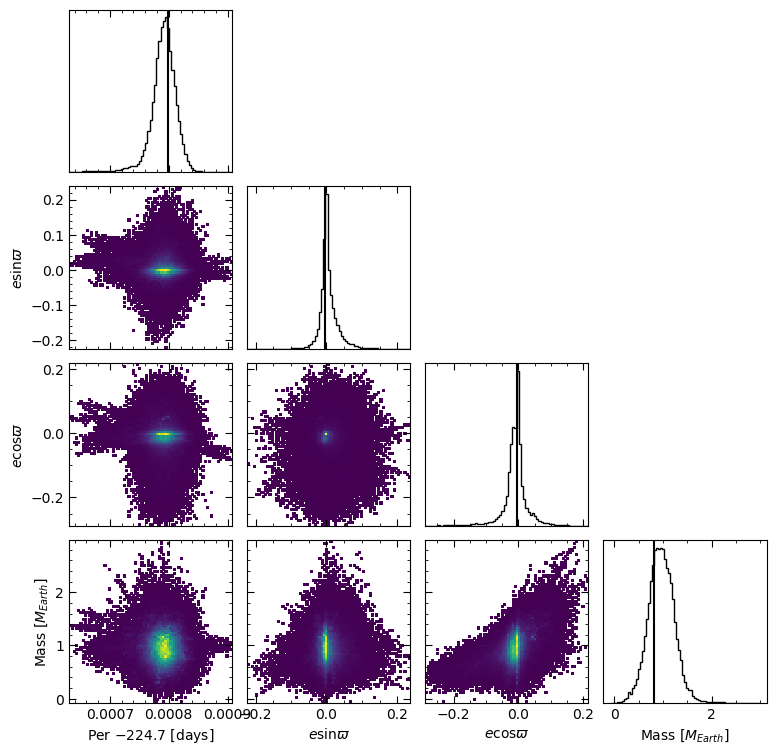

P_mean= 0.0007906515756297472
-0.004975858997178902 <- ecosω & esinω -> -0.003352734293109698


In [131]:
corner_planet(p_mc123,75,"venus")

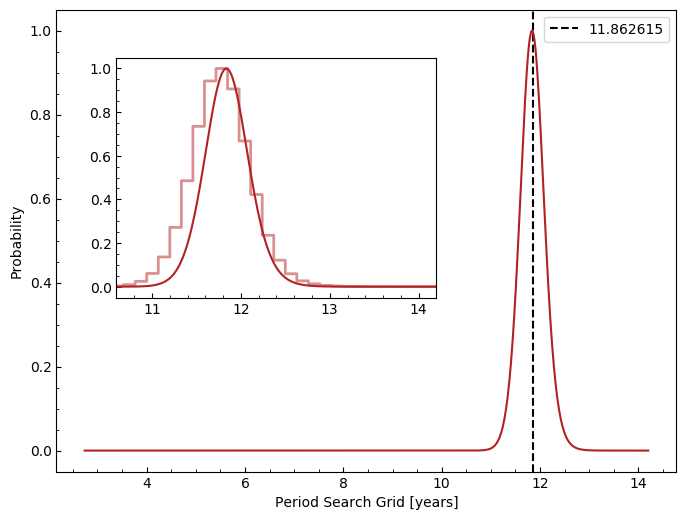

Simulated with σ= 10.0 second noise


In [45]:
include("plot_likelihood.jl")
plot_likelihood(p_115,p_mc115,50,false)

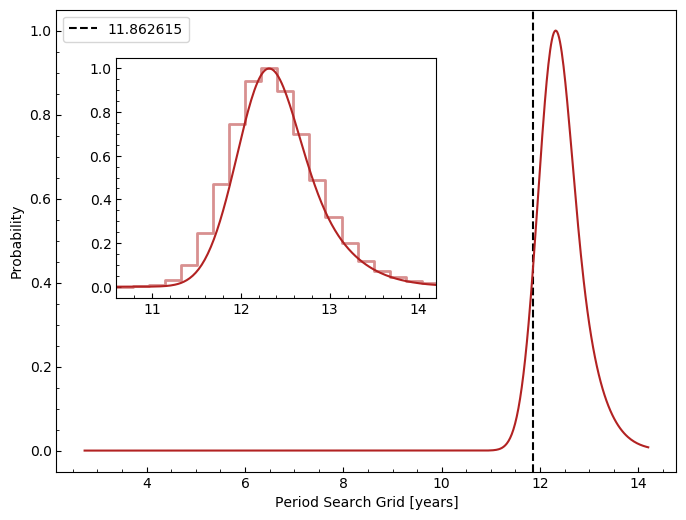

Simulated with σ= 30.0 second noise


In [107]:
plot_likelihood(p_32,p_mc32,50,false)

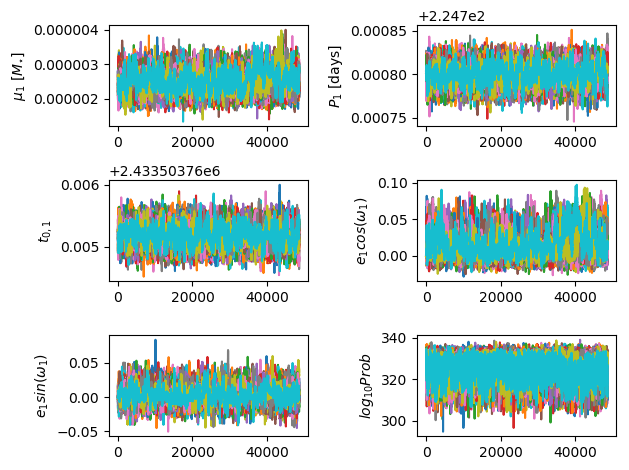

In [210]:
include("plot_emcee.jl")
plot_emcee(p_mc115,"venus")
# xlim(-1,10)

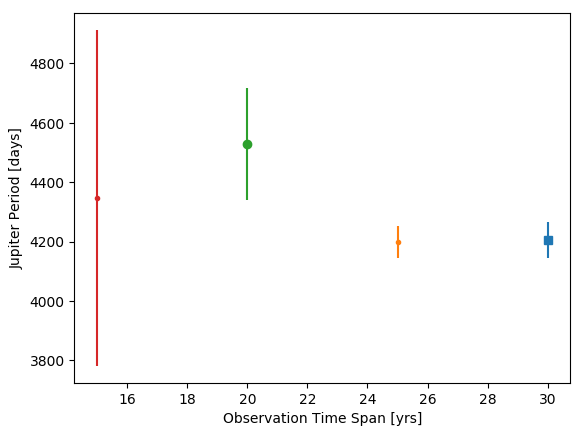

PyObject Text(0.5, 24.0, 'Observation Time Span [yrs]')

In [35]:
function plot_col(col_num)
errorbar(30,mean(p_mc33["par_mcmc"][:,p_mc33["iburn"]:p_mc33["nsteps"],col_num]),std(p_mc33["par_mcmc"][:,p_mc33["iburn"]:p_mc33["nsteps"],col_num]),fmt="s")#,color="black",mec="black",mfc="white")
errorbar(25,mean(p_mc325["par_mcmc"][:,p_mc325["iburn"]:p_mc315["nsteps"],col_num]),std(p_mc325["par_mcmc"][:,p_mc325["iburn"]:p_mc325["nsteps"],col_num]),fmt=".")#,color="black",mec="black",mfc="white")
errorbar(20,mean(p_mc32["par_mcmc"][:,p_mc32["iburn"]:p_mc32["nsteps"],col_num]),std(p_mc32["par_mcmc"][:,p_mc32["iburn"]:p_mc32["nsteps"],col_num]),fmt="o")#,color="black",mec="black",mfc="white")
errorbar(15,mean(p_mc315["par_mcmc"][:,p_mc315["iburn"]:p_mc315["nsteps"],col_num]),std(p_mc315["par_mcmc"][:,p_mc315["iburn"]:p_mc315["nsteps"],col_num]),fmt=".")#,color="black",mec="black",mfc="white")
# errorbar(10,mean(p_mc31["par_mcmc"][:,p_mc31["iburn"]:p_mc31["nsteps"],col_num]),std(p_mc31["par_mcmc"][:,p_mc31["iburn"]:p_mc31["nsteps"],col_num]),fmt="o")#,color="black",mec="black",mfc="white")
    xlabel("Observation Time Span [yrs]")
end
    ylabel("Jupiter Period [days]")
plot_col(12)

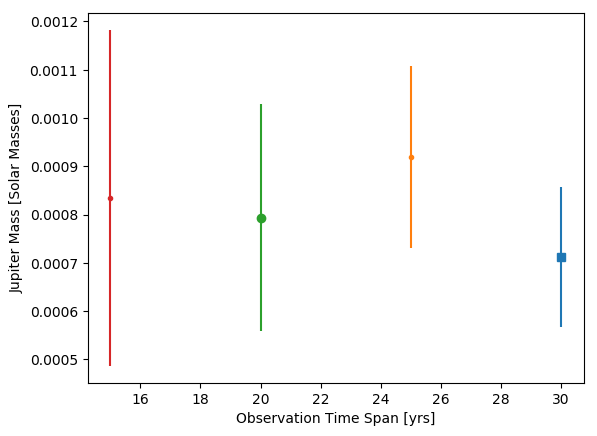

PyObject Text(24.000000000000014, 0.5, 'Jupiter Mass [Solar Masses]')

In [32]:
plot_col(11)
ylabel("Jupiter Mass [Solar Masses]")

In [141]:
function post_vals(jldmc)
pname = ["mu_1","P_1","t01","e1 cos(om1)","e1 sin(om1)",
      "mu_2","P_2","t02","e2 cos(om2)","e2 sin(om2)",
      "mu_3","P_3","t03","e3 cos(om3)","e3 sin(om3)"]
    for i=1:length(pname)
        println("param ",i," mean ",mean(jldmc["par_mcmc"][:,jldmc["iburn"]:jldmc["nsteps"],i])," with std +/- ", std(jldmc["par_mcmc"][:,jldmc["iburn"]:jldmc["nsteps"],i]))
    end
end
post_vals(p_mc33)

param 1 mean 2.5310273677968245e-6 with std +/- 1.9766560365440363e-7
param 2 mean 224.70078026440922 with std +/- 4.7311585572384694e-6
param 3 mean 2.4335037653472153e6 with std +/- 0.00013157954827839973
param 4 mean -0.001337938154797016 with std +/- 0.007850072980011088
param 5 mean 0.0018916807895618423 with std +/- 0.0071840761205759236
param 6 mean 3.025055030935183e-6 with std +/- 1.3575053289944325e-7
param 7 mean 365.25645402109586 with std +/- 1.0825940277708088e-5
param 8 mean 2.433624402172056e6 with std +/- 0.0001826746341853396
param 9 mean 0.013000216927890692 with std +/- 0.006253459923018558
param 10 mean 0.0038902749957805062 with std +/- 0.005758532746008217
param 11 mean 0.0007117892595061528 with std +/- 0.00014523293206378303
param 12 mean 4205.369036760283 with std +/- 60.29797754358711
param 13 mean 2.439090161776908e6 with std +/- 99.47609593170749
param 14 mean -0.0021616001453131205 with std +/- 0.030350124351008277
param 15 mean -0.03688539291378649 with s

In [147]:
post_vals(p_mc32)


param 1 mean 2.364751873800224e-6 with std +/- 2.916966620053028e-7
param 2 mean 224.70078387081927 with std +/- 9.570604036232418e-6
param 3 mean 2.433503765317898e6 with std +/- 0.0001755070361044165
param 4 mean 0.006736458023321758 with std +/- 0.014606050815894892
param 5 mean 0.008092358962561896 with std +/- 0.013079414245881823
param 6 mean 2.9829627070934226e-6 with std +/- 1.9150466729371826e-7
param 7 mean 365.25641221939264 with std +/- 2.6645062876405373e-5
param 8 mean 2.433624402724006e6 with std +/- 0.0002892879016975374
param 9 mean 0.018370397598285296 with std +/- 0.011554058279395414
param 10 mean 0.007472170768977 with std +/- 0.010190687890758731
param 11 mean 0.0007937586488009844 with std +/- 0.00023592189287406537
param 12 mean 4528.761088071658 with std +/- 188.87544503101793
param 13 mean 2.4391752970107966e6 with std +/- 173.64557571657357
param 14 mean 0.004126016886280481 with std +/- 0.04168879721892973
param 15 mean -0.04983496484086676 with std +/- 0.03

In [52]:
m_32=jldopen("FITS/moon_fit30.0s20.0yrs.jld2");m_mc32 = jldopen("MCMC/moon_mcmc30.0s20.0yrs.jld2");
m_325=jldopen("FITS/moon_fit30.0s25.0yrs.jld2");m_mc325 = jldopen("MCMC/moon_mcmc30.0s25.0yrs.jld2");
m_33=jldopen("FITS/moon_fit30.0s30.0yrs.jld2");m_mc33 = jldopen("MCMC/moon_mcmc30.0s30.0yrs.jld2");
# m_34=jldopen("FITS/moon_fit60.0s40.0yrs.jld2");m_mc34 = jldopen("MCMC/moon_mcmc60.0s40.0yrs.jld2");

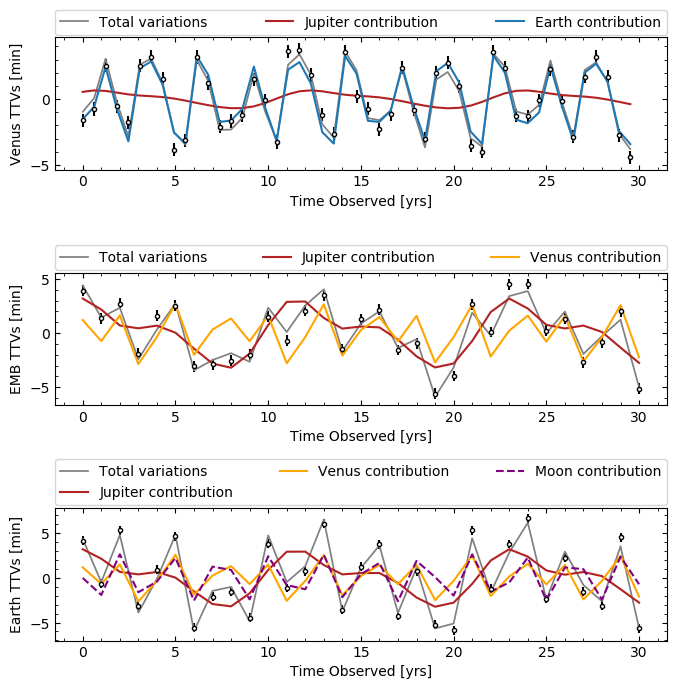

Simulated with σ= 30.0 second noise


In [51]:
# include("plot_ttvs.jl")
# plot_ttvs(p_33,true)

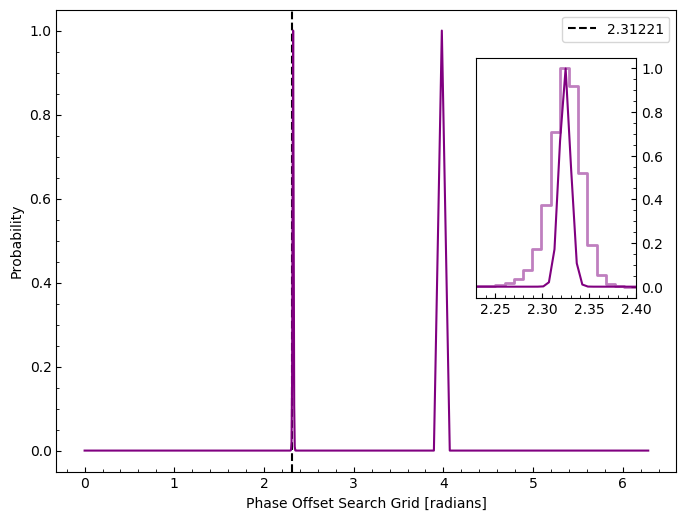

Simulated with σ= 30.0 second noise


In [119]:
include("plot_likelihood.jl")
plot_likelihood(m_32,m_mc32,30,true)

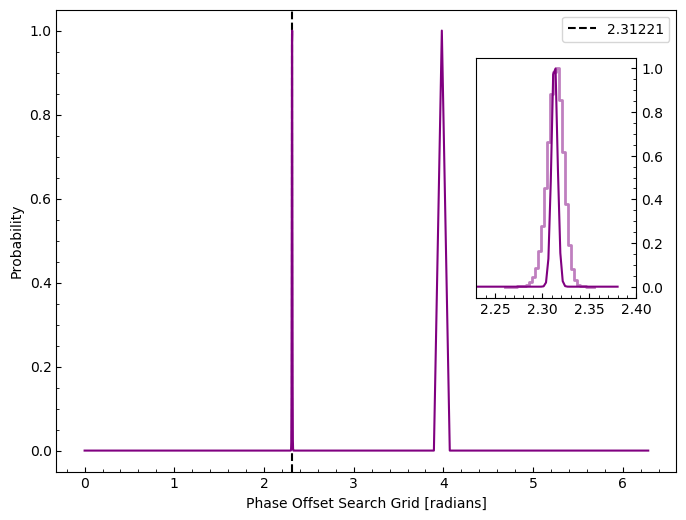

Simulated with σ= 30.0 second noise


In [120]:
include("plot_likelihood.jl")
plot_likelihood(m_33,m_mc33,30,true)

In [98]:
grid = zeros(1)
prob = zeros(1)
for val=1:length(con)
    if con[val] > maximum(xgrid)
#         println(grid_wide[val])
        append!(grid,grid_wide[val])
        append!(prob,lprob_wide[val])
    end
    if con[val] < minimum(xgrid)
        #println(grid_wide[val])
        append!(grid,grid_wide[val])
        append!(prob,lprob_wide[val])
    end
#     if grid_wide[val] > minimum(xgrid) && grid_wide[val]< maximum(xgrid)
#         append!(grid,xgrid[val])
#     end
end

BoundsError: [91mBoundsError: attempt to access 100-element Array{Float64,1} at index [101][39m

In [116]:
con = [grid_wide;xgrid]
cat = [lprob_wide;xprob]
v = sortperm(con)
con_perm = con[v]
cat_perm = cat[v]

300-element Array{Float64,1}:
 7.568162442633809e-129 
 2.4266294150703526e-127
 3.612584071163413e-138 
 3.3504721283049323e-137
 5.3301012221010373e-138
 2.08999913896937e-137  
 2.296398917962244e-137 
 8.445858493508291e-138 
 3.693136654587856e-138 
 7.7089662774492885e-137
 7.885885213988926e-137 
 3.2921592747265396e-121
 8.227548126878545e-132 
 ⋮                      
 0.9914256848532541     
 0.9942859298483251     
 0.9971447986585075     
 1.0                    
 3.718057159171616e-106 
 1.98407681407841e-111  
 1.7663622768847427e-116
 6.613808908088376e-121 
 1.2597206791710992e-124
 1.0877975522911468e-127
 4.139077556215603e-130 
 3.9872155658773114e-132

In [49]:
mask = p_mc315["lprob_mcmc"][:,iburn:nsteps] .> 275
newp3 = p_mc315["par_mcmc"][:,iburn:nsteps,12][mask]

for i=1:nwalkers 
    for j=iburn:nsteps
        if p_mc315["lprob_mcmc"][i,j]<275 
            println(p_mc315["par_mcmc"][i,j,12])
        end 
    end
end


5351.695549630866
5351.695549630866
4526.580386856297
4526.580386856297
9721.09316006962
10108.985189865158
10628.24595123949
10628.24595123949
10628.24595123949
10628.24595123949
10628.24595123949
10628.24595123949
10628.24595123949
11667.011365847133
11667.011365847133
11005.674029231306
11005.674029231306
11005.674029231306
11005.674029231306
11479.03534781344
11479.03534781344
11479.03534781344
11479.03534781344
11479.03534781344
11145.441739472977
11145.441739472977
11619.850528173978
11619.850528173978
11619.850528173978
10172.868636110892
11059.97345343149
11059.97345343149
11059.97345343149
11059.97345343149
11059.97345343149
11059.97345343149
10654.113721187217
10654.113721187217
10654.113721187217
11629.909394725908
11629.909394725908
11016.522406833032
11016.522406833032
11016.522406833032
11016.522406833032
10347.347049418227
10347.347049418227
10347.347049418227
10347.347049418227
10347.347049418227
11814.761804152598
11814.761804152598
10997.665116061075
10997.66511606107

9637.252766174524
9990.544570483795
9990.544570483795
9990.544570483795
10944.803365824291
11300.643653448351
11300.643653448351
11300.643653448351
9955.771625033234
9955.771625033234
9180.752905479667
9180.752905479667
9180.752905479667
9379.330069260015
9300.211644462725
7933.202528153799
8243.46943503874
8505.246019272681
12993.712345031101
13044.431622710987
11930.91438176385
11930.91438176385
13252.062943815365
13252.062943815365
13252.062943815365
13252.062943815365
13252.062943815365
13252.062943815365
10496.693034831625
10496.693034831625
10496.693034831625
10496.693034831625
10808.201875280933
10856.106082519895
10856.106082519895
12292.153851903247
12292.153851903247
10577.434581945037
10577.434581945037
10581.26595047328
11402.520607801665
11402.520607801665
11402.520607801665
11023.918542792348
10968.920487784051
10968.920487784051
10968.920487784051
10468.471805515925
12065.974865018312
12065.974865018312
12045.898937267468
12045.898937267468
12045.898937267468
11217.06166

11519.621172792975
11519.621172792975
11335.454958577
11703.39724329363
11703.39724329363
12373.296455737831
12373.296455737831
12373.296455737831
12373.296455737831
10653.90700401695
10653.90700401695
10653.90700401695
12020.836202841605
12020.836202841605
12020.836202841605
14785.694914987866
14785.694914987866
14785.694914987866
12168.74595103326
11374.702070490584
15720.496985786236
12619.004910194568
12619.004910194568
12013.588567596462
11375.351626027908
11375.351626027908
14281.906769700181
14281.906769700181
13313.395630961044
14164.178673484907
13950.249174196462
12356.682201131927
11653.082657968223
11653.082657968223
11001.291447015155
11001.291447015155
11001.291447015155
11001.291447015155
11001.291447015155
11001.291447015155
10878.387680678034
10878.387680678034
10878.387680678034
10663.57390360954
10898.011837803799
11049.727935529138
10651.08662322011
11460.362943723268
10995.908533149352
10995.908533149352
10995.908533149352
11453.702700314869
11453.702700314869
1145

4753.09972764222
4753.09972764222
4753.09972764222
